In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random as rd


In [192]:

# Load the weights
weight = scipy.io.loadmat('ex3weights.mat')


In [193]:

#saparating the weights 
weight.keys()
theta1=weight["Theta1"]
theta2=weight["Theta2"]
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [194]:

# Load the data file
mat= scipy.io.loadmat('ex3data1.mat')


In [195]:

def choice (n):
   # Generate one  random numbers
    random_number1 = rd.randint(0, n)
    random_number2 = random_number1+20
    return random_number1,random_number2


In [196]:

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

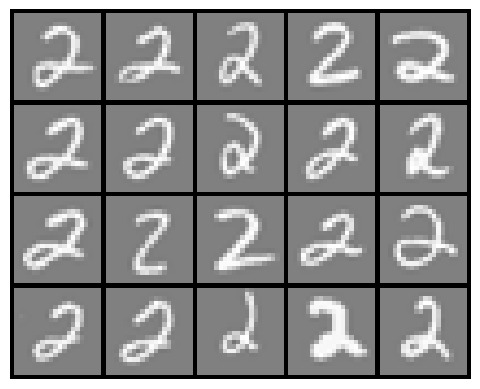

In [197]:

def display_data(X, example_width=None):
    # Set example_width automatically if not passed in
    if example_width is None:
        example_width = int(np.round(np.sqrt(X.shape[1])))

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),
                              pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, :]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          X[curr_ex, :].reshape(example_height, example_width) / max_val
            curr_ex += 1
        if curr_ex >= m:
            break

    # Display Image
    plt.imshow(display_array, cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

a,b=choice(5000)
display_data(mat['X'][a:b])



In [198]:

m,n=mat["X"].shape

In [199]:

X=np.ones((5000,401))

In [200]:

X[:,1:]=mat["X"]

In [201]:

# Sigmoid function to model probability
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [202]:

base1=np.ones((1,26))

In [203]:

# Neural Network model
def model(input,N):
    layer1=sigmoid(input.dot(theta1.T))
    if N==1:
        base1[0,1:]=layer1
        layer2=sigmoid(base1.dot(theta2.T))
    else:
        base2[:,1:]=layer1 
        layer2=sigmoid(base2.dot(theta2.T))
    return layer2.T

In [204]:

base_array1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,0])

In [205]:

#transforming model prediction according to the need 
def predict(input,N):
    output=model(input,N)
    if N==1:
        j=((output)>=.5).astype(int)
        for i in range(10):
            if j[i]== 1:
                return base_array1[i]
    else:
        output=model(input,N)
        j=((output)>=.5).astype(int)
        return j

In [206]:

def choice (n):
   # define the range
   # Generate two random numbers
    random_number1 = rd.randint(0, n)
    return random_number1


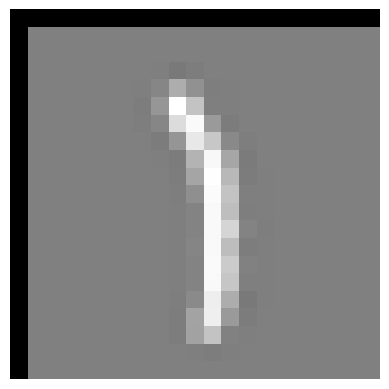

the computer predict the image is of 1




In [207]:

# display a image from the data set and the trained model prediction of the same image 
def display_example(X, example_index, example_width=None):
    if example_width is None:
        example_width = int(np.round(np.sqrt(X.shape[1])))

    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_cols = int(np.ceil(m))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = -np.ones((pad + example_height, pad + example_width))

    # Copy the example into the display array
    example = X[example_index, :].reshape(example_height, example_width)
    max_val = np.max(np.abs(example))
    display_array[pad + np.arange(example_height), pad + np.arange(example_width)[:, np.newaxis]] = example / max_val

    # Display Image
    plt.imshow(display_array, cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

a=choice(5000)
display_example(mat['X'],a)  

computerprediction=predict(X[a],1)
print(f"the computer predict the image is of {computerprediction}" )
print("\n")


In [208]:

base_array2= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,10])

# Create the matrix by tiling the base array along columns (axis=1)
Y= np.tile(base_array2, (5000, 1)).T

In [209]:

Y[:,0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [210]:

#converting the excepted out put Yto the form that model outputes 
for i in range (5000):
    Y[:,i]=(Y[:,i]==mat["y"][i]).astype(int)

In [211]:

base2=np.ones((5000,26))

In [212]:

#model prediction on the dataset it is trained on 
computerprediction=predict(X,2)

In [213]:

computerprediction.shape

(10, 5000)

In [214]:


# Compare the matrices element-wise and create a boolean matrix indicating differences
differences = computerprediction!= Y

# Calculate the percentage of differences
percentage_wrong = (np.count_nonzero(differences) / differences.size) * 100
percentage_correct=100-percentage_wrong

print("Percentage of elements that are correct: {:.2f}%".format(percentage_correct))


Percentage of elements that are correct: 99.34%
